# Fluxograma do óxido de etileno

## Apresentação

Esse notebook demonstra a formulação e a solução do balanço material de um fluxograma de produção do óxido de etileno em Python utilizando a biblioteca [Sympy](http://sympy.org/en/index.html).

## Oxido de Etileno

<p><a href="http://commons.wikimedia.org/wiki/File:TASNEE_001.jpg#/media/File:TASNEE_001.jpg"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/TASNEE_001.jpg/1200px-TASNEE_001.jpg" alt="TASNEE 001.jpg"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:TASNEE_001.jpg#/media/File:TASNEE_001.jpg"

## Problema Proposto (Murphy 2005, Exemplo 3.19)

O problema propõe analisar a capacidade de existência do processo de produção do óxido de etileno pela reação de etileno com oxigênio

$$2\,C_2H_4 + O_2 \longrightarrow 2\,C_2H_4O$$

O objetivo é produzir 1.7 &#215; 10<sup>6</sup> kgmol/ano de óxido de etileno com 98 mol% de pureza.<br/> 
A vazão de alimentação de etileno é especificada em 196 kgmol/hr, e de oxigênio oxygen é especificada em 84.5 kgmol/hr.<br/>
O reator tem uma conversão nominal de passagem única de 6% etileno.<br/> 
O separador recupera 98% do etileno e 99.5% do oxigênio para o reciclo e 97% de óxido de etileno para a corrente de produto. 

<img src="https://github.com/amandalemette/ENG1818/blob/c9940469a1300fa902126b85321e683c688b63f9/Imagens/im4.png?raw=true"  width=600 height=200 />

O problema é encontrar a pureza nominal do produto e as taxas de produção e examinar a sensibilidade da pureza e produção do produto às especificações do equipamento.

### Resolução

A estratégia de solução é representar as variáveis de corrente e de grau de avanço de reação como variáveis simbólicas, e expressar o balanço material e as especificações do processo como equações simbólicas e finalmente utilizar o Sympy para resolver o sistema formulado e executar a análise paramétrica.

A célula seguinte inicializa a biblioteca **Sympy**.  

In [ ]:
%matplotlib inline

import sympy as sym

### Variáveis

#### Correntes 

As variáveis correntes são sistematicamente criadas utilizando a função Sympy `var`, e adicionando elas na lista chamada `stream_table`.

<center><img src="https://github.com/amandalemette/ENG1818/blob/c9940469a1300fa902126b85321e683c688b63f9/Imagens/im4.png?raw=true"  width=600 height=200 />

In [ ]:
stream_table = []
stream_table.append(sym.var('nE1 nO1 nEO1'))   # Stream 1
stream_table.append(sym.var('nE2 nO2 nEO2'))   # Stream 2
stream_table.append(sym.var('nE3 nO3 nEO3'))   # Stream 3
stream_table.append(sym.var('nE4 nO4 nEO4'))   # Stream 4
stream_table.append(sym.var('nE5 nO5 nEO5'))   # Stream 5

display(stream_table)

#### Grau de Avanço

Esse problema inclui somente uma reação em um único reator. O correspondente grau de avanço será representado por uma variável criada pelo Sympy.

In [ ]:
extents = [sym.var('X')]
display(extents)

Vamos criar uma lista com todas as variáveis:

In [ ]:
variables = []
for x in extents:
    variables.append(x)
for s in stream_table:
    for v in s:
        variables.append(v)

display(variables)

### Equações

#### Balanço Material

Os balanços materiais são escritos para cada operação unitária usando a lista de correntes simbólicas e a variável para o grau de reação criadas.  

Cada balanço de material é expresso como a taxa líquida de acúmulo e será definido como zero para especificar a operação em regime estacionário. 

Os balanços materiais são reunidos em uma lista para cada operação unitária, em seguida, as listas são concatenadas para criar uma lista de todos os balanços.

<center><img src="https://github.com/amandalemette/ENG1818/blob/c9940469a1300fa902126b85321e683c688b63f9/Imagens/im4.png?raw=true"  width=600 height=200 />

In [ ]:
mixer = [
    sym.Eq(0, nE1 + nE5 - nE2),
    sym.Eq(0, nO1 + nO5 - nO2),
    sym.Eq(0, nEO5 - nEO2)]

reactor = [
    sym.Eq(0, nE2 - nE3 - 2*X),
    sym.Eq(0, nO2 - nO3 - X),
    sym.Eq(0, nEO2 - nEO3 + 2*X)]

separator = [
    sym.Eq(0, nE3 - nE4 - nE5),
    sym.Eq(0, nO3 - nO4 - nO5),
    sym.Eq(0, nEO3 - nEO4 - nEO5)]

material_balances = mixer + reactor + separator

for eqn in material_balances:
    display(eqn)

#### Especificações

As especificações do processo são escritas como equações utilizando a função do Sympy `Eq`.

<center><img src="https://github.com/amandalemette/ENG1818/blob/c9940469a1300fa902126b85321e683c688b63f9/Imagens/im4.png?raw=true"  width=600 height=200 />

In [ ]:
feed_spec = [
    sym.Eq(nE1, 196.0),
    sym.Eq(nO1, 84.5),
    sym.Eq(nEO1, 0.0)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec

for eqn in specifications:
    display(eqn)

### Análise de Grau de Liberdade

Uma análise simples dos graus de liberdade é feita comparando o número total de variáveis com o de equações.

In [14]:
nVars = 0
nstream = 0
for s in stream_table:
    for v in s:
        nVars += 1
        print(f"Corrente: {nstream}, Variável: {v.name}, Número de Variáveis: {nVars}")
    nstream += 1

print("\n%d Grau de avanço da reação\n" % len(extents))
for v in extents:
    print("Grau de avanço da reação: ", v.name)

print("\n%d Variaveis = %d Variáveis de Corrente + %d Grau de avanço \n" \
    % (len(variables),nVars,len(extents)))

Corrente: 0, Variável: nE1, Número de Variáveis: 1
Corrente: 0, Variável: nO1, Número de Variáveis: 2
Corrente: 0, Variável: nEO1, Número de Variáveis: 3
Corrente: 1, Variável: nE2, Número de Variáveis: 4
Corrente: 1, Variável: nO2, Número de Variáveis: 5
Corrente: 1, Variável: nEO2, Número de Variáveis: 6
Corrente: 2, Variável: nE3, Número de Variáveis: 7
Corrente: 2, Variável: nO3, Número de Variáveis: 8
Corrente: 2, Variável: nEO3, Número de Variáveis: 9
Corrente: 3, Variável: nE4, Número de Variáveis: 10
Corrente: 3, Variável: nO4, Número de Variáveis: 11
Corrente: 3, Variável: nEO4, Número de Variáveis: 12
Corrente: 4, Variável: nE5, Número de Variáveis: 13
Corrente: 4, Variável: nO5, Número de Variáveis: 14
Corrente: 4, Variável: nEO5, Número de Variáveis: 15

1 Grau de avanço da reação

Grau de avanço da reação:  X

16 Variaveis = 15 Variáveis de Corrente + 1 Grau de avanço 



In [16]:
equations = material_balances + specifications
print("\n%d Equacoes = %d Balancos Materiais + %d Especificacoes" \
    % (len(equations),len(material_balances),len(specifications)))

print("\n%d Balancos Materiais\n" % len(material_balances))
for mb in material_balances:
    print(mb)

print("\n%d Especificacoes\n" % len(specifications))
for spec in specifications:
    print(spec)


16 Equacoes = 9 Balancos Materiais + 7 Especificacoes

9 Balancos Materiais

Eq(0, nE1 - nE2 + nE5)
Eq(0, nO1 - nO2 + nO5)
Eq(0, -nEO2 + nEO5)
Eq(0, -2*X + nE2 - nE3)
Eq(0, -X + nO2 - nO3)
Eq(0, 2*X + nEO2 - nEO3)
Eq(0, nE3 - nE4 - nE5)
Eq(0, nO3 - nO4 - nO5)
Eq(0, nEO3 - nEO4 - nEO5)

7 Especificacoes

Eq(nE1, 196.0)
Eq(nO1, 84.5)
Eq(nEO1, 0.0)
Eq(nE2 - nE3, 0.06*nE2)
Eq(nE5, 0.98*nE3)
Eq(nO5, 0.995*nO3)
Eq(nEO4, 0.97*nEO3)


### Solução

In [17]:
soln = sym.solve(material_balances + specifications)

for k in soln.keys():
    print("Variavel {0:4s}:  {1:8.2f}".format(str(k),round(soln[k],2)))

Variavel X   :     74.62
Variavel nE1 :    196.00
Variavel nE2 :   2487.31
Variavel nE3 :   2338.07
Variavel nE4 :     46.76
Variavel nE5 :   2291.31
Variavel nEO2:      4.62
Variavel nEO3:    153.85
Variavel nEO4:    149.24
Variavel nEO5:      4.62
Variavel nO1 :     84.50
Variavel nO2 :   2050.76
Variavel nO3 :   1976.14
Variavel nO4 :      9.88
Variavel nO5 :   1966.26
Variavel nEO1:      0.00


In [18]:
# display solution for each variable, rounded to 1 decimal place
for v in variables:
    display(sym.Eq(v,round(soln[v],1)))

#### Produção e Pureza

kgmol/h ---> (precisa virar) kgmol/ano

kgmol/h*24 h/dia*364 dias/ano

In [20]:
purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])
production = 24*364*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000

print("Producao anual %4.2f milhoes kgmol/ano a %5.3f pureza." \
    % (production,purity))

Producao anual 1.80 milhoes kgmol/ano a 0.725 pureza.


#### Para refletir e discutir...

* Esses números te surpreendem? Por que a taxa de reciclo é tão alta? 
* Por que a especificação da pureza não foi atendida?

### Análise Paramétrica: Conversão fracionada de etileno 

O problema pedia uma análise da sensibilidade dos resultados do problema às mudanças no desempenho da unidade. Isso é implementado reafirmando as especificações onde um parâmetro chave é substituído por uma variável simbólica, e o processo o desempenho plotado em função do parâmetro.

In [21]:
feed_spec = [
    sym.Eq(nE1, 196.0),
    sym.Eq(nO1, 84.5),
    sym.Eq(nEO1, 0.0)]

fconv = sym.var('fconv')

reactor_spec = [
    sym.Eq(nE2 - nE3, fconv*nE2)]

separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec

for s in specifications:
    display(s)

Os cálculos de reciclo introduzem uma forte dependência das taxas de fluxo a parâmetros como conversão de frações no reator e recuperação fracionária em unidades de separação.

Para ver isso, aqui resolvemos a vazão de E<sub>2</sub> em função da conversão fracionária de etileno no reator.

A partir do balanço material

E<sub>2</sub> = E<sub>1</sub> + E<sub>5</sub><br>
E<sub>3</sub> = (1-f<sub>conv</sub>) E<sub>2</sub><br>
E<sub>5</sub> = 0.98 E<sub>3</sub><br>


<center><img src="https://github.com/amandalemette/ENG1818/blob/c9940469a1300fa902126b85321e683c688b63f9/Imagens/im4.png?raw=true"  width=600 height=200 />

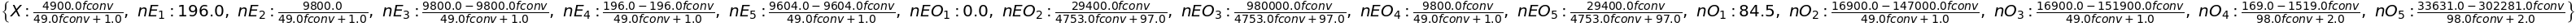

In [22]:
soln = sym.solve(material_balances + specifications, exclude=[fconv])
soln

In [24]:
display(sym.Eq(nE2,soln[nE2]))

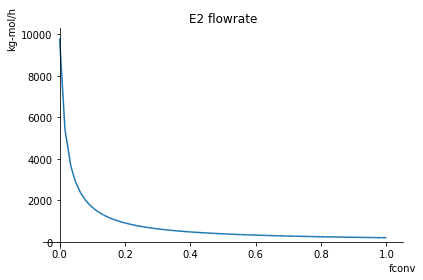

In [25]:
sym.plot(soln[nE2],(fconv,0,1),xlabel='fconv',ylabel='kg-mol/h',title='E2 flowrate')

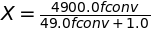

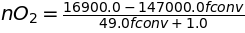

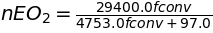

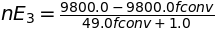

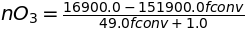

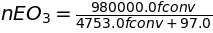

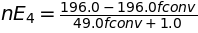

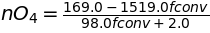

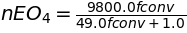

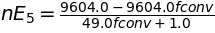

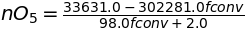

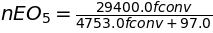

In [26]:
for v in variables:
    display(sym.Eq(v, soln[v]))

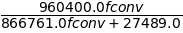

In [27]:
purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])

display(sym.simplify(purity))

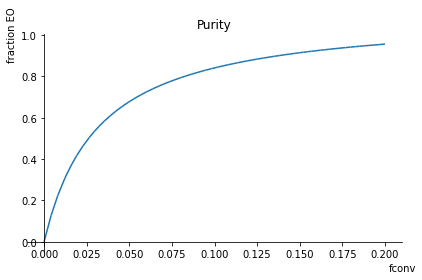

In [28]:
sym.plot(purity,(fconv,0,.2),xlabel='fconv',ylabel='fraction EO',title='Purity');

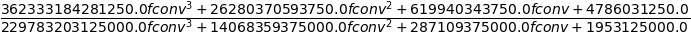

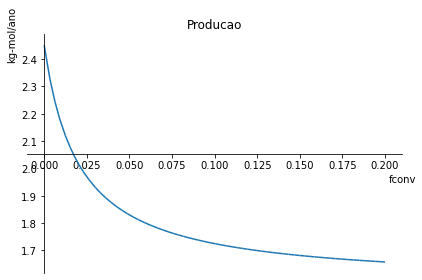

In [30]:
production = 24*364*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000

display(sym.simplify(production))
sym.plot(production,(fconv,0,0.2),xlabel='fconv',ylabel='kg-mol/ano',title='Producao');

### Análise Paramétrica: Recuperação Fracionada de Óxido de Etileno para Produto

A melhoria da recuperação do óxido de etileno no fluxo do produto melhorará a pureza do produto? Faça uma previsão e, em seguida, verifique os resultados dos cálculos a seguir.

In [31]:
feed_spec = [
    sym.Eq(nE1,196.0),
    sym.Eq(nO1, 84.5)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

frcvr = sym.var('frcvr')
separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, frcvr*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

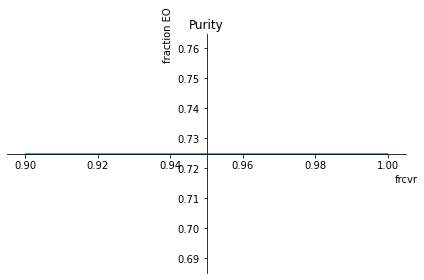

In [32]:
soln = sym.solve(material_balances + specifications, exclude=[frcvr])

purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])

display(purity)
sym.plot(purity,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='fraction EO',title='Purity');

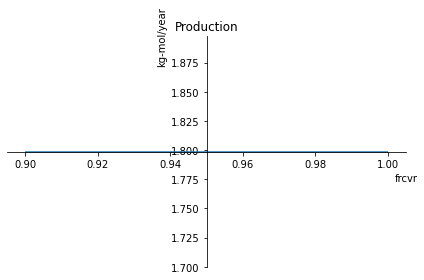

In [33]:
production = 24*364*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000.0
display(production)
sym.plot(production,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='kg-mol/year',title='Production');

### Análise Paramétrica: Recuperação Fracionada de Etileno para Reciclo

Aumentar a fração de etileno recuperada para reciclo deve melhorar a pureza do produto. Vamos ver o que acontece quando a elevamos.

In [34]:
feed_spec = [
    sym.Eq(nE1,196.0),
    sym.Eq(nO1, 84.5)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

frcvr = sym.var('frcvr')
separator_spec = [
    sym.Eq(nE5, frcvr*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

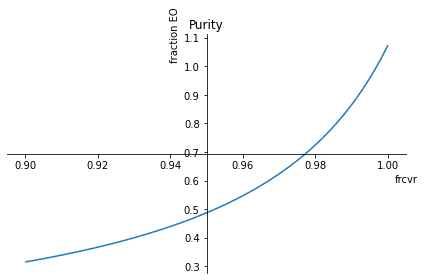

In [35]:
soln = sym.solve(material_balances + specifications,exclude=[frcvr])

purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])
display(sym.simplify(purity))
sym.plot(purity,(frcvr,0.9,1),xlabel='frcvr',ylabel='fraction EO',title='Purity');

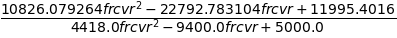

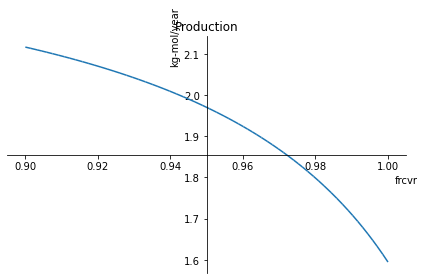

In [37]:
production = 24*364*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000.0
display(sym.simplify(production))
sym.plot(production,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='kg-mol/year',title='Production');

#### Análise Paramétrica: Altere a Taxa de Alimentação de Oxigênio

Como descobrimos, a taxa de alimentação de oxigênio não é suficiente para consumir todo o etileno. Vamos explorar o que acontece se mudarmos a taxa de alimentação de oxigênio.

In [38]:
oxyfeed = sym.var('oxyfeed')
feed_spec = [
    sym.Eq(nE1,196.0),
    sym.Eq(nO1,oxyfeed)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

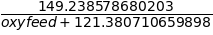

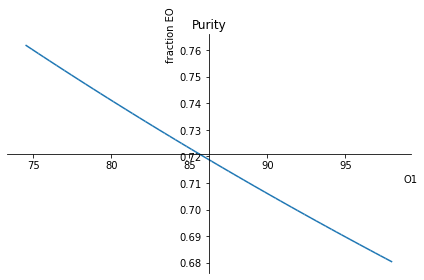

In [39]:
soln = sym.solve(material_balances + specifications, exlude=[oxyfeed])

purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])
display(sym.simplify(purity))
sym.plot(purity,(oxyfeed,74.5,196/2),xlabel='O1',ylabel='fraction EO',title='Purity');

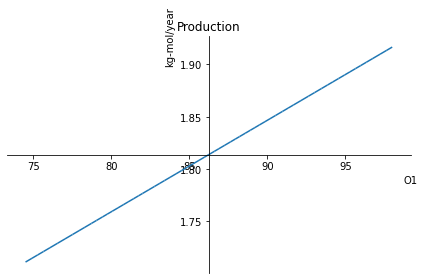

In [40]:
production = 24*364*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000
display(sym.simplify(production))
sym.plot(production,(oxyfeed,74.5,196/2),xlabel='O1',ylabel='kg-mol/year',title='Production');

## Conclusões

* As especificações nominais do processo rendem uma pureza do produto de 72,5 mol% e uma produção de 1,73 milhão de kgmol/ano. A pureza do produto fica significativamente aquém da pureza desejada de 98% em mol.
* A pureza do produto pode ser aumentada aumentando a conversão do reator de passagem única, aumentando a recuperação de etileno para reciclar e diminuindo a alimentação de oxigênio. Individual, no entanto, essas alterações não são suficientes para atender à pureza desejada.
* Você consegue encontrar especificações que atendam à especificação de 98% de pureza do produto?